## 1) Importing all the required libraries

In [11]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import spacy
import gensim
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import scipy as sp
import sklearn
import sys
from nltk.corpus import stopwords
import nltk
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle
from nltk.corpus import stopwords
from collections import Counter
import math
from gensim.models.coherencemodel import CoherenceModel
import tqdm
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile
from gensim.models import LsiModel
from gensim.parsing.preprocessing import stem_text,preprocess_string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from gensim import corpora

#IMPORTING LIBRARIES FOR PLOTTING
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading BokehJS ...

## 2) Loading Data and Prepocessing

### Code credit: https://github.com/rsreetech/LDATopicModelling/blob/main/LDADemo.ipynb

### load the data and select the desired columns

In [13]:
datafile = "finalout3.csv"
rawdata = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)
review_data= rawdata.loc[:, rawdata.columns.intersection(['combinedText','created'])]

In [14]:
rawdata

,Unnamed: 0,id,url,title,score,comms_num,created,body,timestamp,combinedText
0,0,lu7npx,https://www.reddit.com/r/CryptoCurrency/commen...,Delete your widgets,1,0,2021-02-28 00:27:45,[removed],NaN,Delete widget removed
1,1,lu7nfe,https://www.reddit.com/r/CryptoCurrency/commen...,Thank You! For all the laughs!,9,10,2021-02-28 00:27:26,With the difficult few days many of us have ex...,NaN,Thank You For laugh With difficult day many u ...
2,2,gp4nbyx,NaN,Comment,5,0,2021-02-28 00:34:08,I'm only laughing on the outside.,NaN,Im laughing outside
3,3,gp4n1q3,NaN,Comment,4,0,2021-02-28 00:32:15,"Whatever happens, just keep smiling\n\n![gif](...",NaN,Whatever happens keep smilinggifgiphyQFdBjMRZD...
4,4,gp4plw7,NaN,Comment,2,0,2021-02-28 00:49:22,How the shit do you post a gif comment in some...,NaN,How shit post gif sub
...,...,...,...,...,...,...,...,...,...,...
37147,21931,hapihix,NaN,Comment,18,0,1630173656.0,Looks like Steven Seagal is *Under Siege*,2021-08-28 21:00:56,Looks like Steven Seagal Under Siege
37148,21932,hapihih,NaN,Comment,2,0,1630173656.0,Thank you for explaining!!,2021-08-28 21:00:56,Thank explaining
37149,21933,hapihc4,NaN,Comment,2,0,1630173653.0,"Mine are safe, don't worry.",2021-08-28 21:00:53,Mine safe dont worry
37150,21934,hapihb6,NaN,Comment,1,0,1630173653.0,Oh wow poor dogs! I feel sad now :\\,2021-08-28 21:00:53,Oh wow poor dog I feel sad


In [15]:
review_data

,created,combinedText
0,2021-02-28 00:27:45,Delete widget removed
1,2021-02-28 00:27:26,Thank You For laugh With difficult day many u ...
2,2021-02-28 00:34:08,Im laughing outside
3,2021-02-28 00:32:15,Whatever happens keep smilinggifgiphyQFdBjMRZD...
4,2021-02-28 00:49:22,How shit post gif sub
...,...,...
37147,1630173656.0,Looks like Steven Seagal Under Siege
37148,1630173656.0,Thank explaining
37149,1630173653.0,Mine safe dont worry
37150,1630173653.0,Oh wow poor dog I feel sad


### further cleaning the data

In [16]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    return text2.lower()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rudra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### dropping NA values

In [17]:
review_data.dropna(axis = 0, how ='any',inplace=True) 
review_data

,created,combinedText
0,2021-02-28 00:27:45,Delete widget removed
1,2021-02-28 00:27:26,Thank You For laugh With difficult day many u ...
2,2021-02-28 00:34:08,Im laughing outside
3,2021-02-28 00:32:15,Whatever happens keep smilinggifgiphyQFdBjMRZD...
4,2021-02-28 00:49:22,How shit post gif sub
...,...,...
37147,1630173656.0,Looks like Steven Seagal Under Siege
37148,1630173656.0,Thank explaining
37149,1630173653.0,Mine safe dont worry
37150,1630173653.0,Oh wow poor dog I feel sad


### Extracting discussions with over 3 words in post (getting rid of short discussion)

In [18]:
review_data['combinedText'] = review_data['combinedText'].apply(clean_text)
review_data['Num_words_text'] = review_data['combinedText'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(len(review_data))
print('-------------------------')
max_review_data_sentence_length  = review_data['Num_words_text'].max()

mask = (review_data['Num_words_text'] < 2000) & (review_data['Num_words_text'] >=3)
df_short_reviews = review_data[mask]
df_sampled = df_short_reviews.apply(lambda x: x.sample(n=29855)).reset_index(drop = True)
print('No of long discussions')
print(len(df_short_reviews))

-------Dataset --------
36829
-------------------------
No of long discussions
29855


In [19]:
max_review_data_sentence_length

1941

In [20]:
df_sampled=df_sampled.dropna(subset=['combinedText'],how='all')
df_sampled['combinedText'].isna().sum()

0

### Lemmatizing the cleaned words

In [21]:
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
# function to lemmatize
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output 
text_list=df_sampled['combinedText'].tolist()
text_list = [x for x in text_list if str(x) != 'nan']
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[10])

['coin', 'rule']


### removing blank lists after lemmatization

In [22]:
text_list= list(filter(None, text_list))
np.size(text_list)

29855

# 3) Modelling

## 3.1) LDA

In [23]:
#creating document term matrix (corpus) and the dictonary
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=100, passes=30,iterations=100)
lda_model.print_topics()

[(0,
  '0.080*"year" + 0.034*"world" + 0.031*"investment" + 0.029*"great" + 0.026*"game" + 0.022*"portfolio" + 0.021*"idea" + 0.017*"early" + 0.017*"time" + 0.016*"gain"'),
 (1,
  '0.076*"problem" + 0.047*"information" + 0.042*"open" + 0.039*"solution" + 0.030*"development" + 0.027*"vault" + 0.024*"group" + 0.024*"recent" + 0.021*"individual" + 0.020*"creator"'),
 (2,
  '0.050*"post" + 0.047*"user" + 0.043*"asset" + 0.042*"point" + 0.037*"work" + 0.031*"currency" + 0.030*"seed" + 0.028*"large" + 0.026*"hour" + 0.025*"digital"'),
 (3,
  '0.028*"ethereum" + 0.027*"project" + 0.027*"blockchain" + 0.022*"transaction" + 0.021*"exchange" + 0.016*"network" + 0.015*"smart" + 0.014*"coinbase" + 0.014*"profit" + 0.013*"contract"'),
 (4,
  '0.079*"wallet" + 0.053*"future" + 0.041*"question" + 0.039*"high" + 0.032*"company" + 0.032*"fund" + 0.031*"worth" + 0.031*"dollar" + 0.028*"financial" + 0.028*"word"'),
 (5,
  '0.060*"price" + 0.038*"account" + 0.030*"amount" + 0.023*"different" + 0.020*"smal

#### Above output shows which words belong with which topic number and with what weightage

### Interactive visualisation of the topics

In [24]:
# credits: https://github.com/bmabey/pyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\rudra\anaconda3\envs\best\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.096531 -0.427845       1        1  18.959057
6      0.351115 -0.025973       2        1  17.877417
5     -0.114526  0.081816       3        1  10.763040
9     -0.089935 -0.035988       4        1   9.505060
0      0.081842  0.035943       5        1   9.207212
8      0.223633  0.014729       6        1   8.379940
4     -0.095093  0.092134       7        1   8.253373
7     -0.094440  0.093846       8        1   7.227945
2     -0.102880  0.096546       9        1   7.082220
1     -0.063186  0.074793      10        1   2.744735, topic_info=             Term         Freq        Total Category  logprob  loglift
69         crypto  8910.000000  8910.000000  Default  30.0000  30.0000
132       bitcoin  4421.000000  4421.000000  Default  29.0000  29.0000
2            coin  5730.000000  5730.000000  Default  28.0000  28.0000
10         people  4931.000000  4931.000000  Default  27.0000  27.0000
24           year  3286.000000  3286.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1346  requirement    90.772662    91.548852  Topic10  -4.8990   3.5870
240   corporation    82.754404    83.530742  Topic10  -4.9915   3.5861
6901   compliance    80.162803    80.939067  Topic10  -5.0233   3.5858
2631        login    78.405227    79.181483  Topic10  -5.0455   3.5856
146       benefit   147.605775   211.683283  Topic10  -4.4128   3.2349

[341 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
409       1  0.999015     able
280       2  0.999269   access
115       3  0.999746  account
44        7  0.998363   action
933       4  0.998541   actual
...     ...       ...      ...
438       9  0.999160     work
72        5  0.999498    world
62        7  0.999239    worth
839       4  0.998282    wrong
24        5  0.999812     year

[314 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 6, 10, 1, 9, 5, 8, 3, 2])

### Evaluating the LDA topic model

In [25]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix)) 

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.984320253570987

Coherence Score:  0.3811633238736845


### The lower the perplexity the better
### the higher the coherence score the better the model is performing

# 3.2) Finding the optimum number of topics to be extracted using topic modeling

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state=100,chunksize=1000, passes=30,iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [27]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=20, step=1)

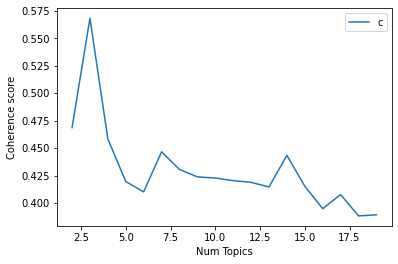

In [28]:
# Show graph
x = range(2, 20, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [29]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4687
Num Topics = 3  has Coherence Value of 0.5684
Num Topics = 4  has Coherence Value of 0.4583
Num Topics = 5  has Coherence Value of 0.4196
Num Topics = 6  has Coherence Value of 0.4101
Num Topics = 7  has Coherence Value of 0.4466
Num Topics = 8  has Coherence Value of 0.4306
Num Topics = 9  has Coherence Value of 0.4238
Num Topics = 10  has Coherence Value of 0.4228
Num Topics = 11  has Coherence Value of 0.4203
Num Topics = 12  has Coherence Value of 0.4188
Num Topics = 13  has Coherence Value of 0.4146
Num Topics = 14  has Coherence Value of 0.4434
Num Topics = 15  has Coherence Value of 0.4153
Num Topics = 16  has Coherence Value of 0.3948
Num Topics = 17  has Coherence Value of 0.4077
Num Topics = 18  has Coherence Value of 0.3882
Num Topics = 19  has Coherence Value of 0.3892


### From the above graph and coherent scores we can see that model with 3 number of topics has the highest score.

### Rebuilding the model with the selected optimum number of topics

In [30]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.027*"crypto" + 0.021*"coin" + 0.017*"people" + 0.015*"time" + 0.014*"good" + 0.014*"money" + 0.013*"market" + 0.011*"year" + 0.011*"price" + 0.009*"wallet"'),
 (1,
  '0.018*"bitcoin" + 0.014*"blockchain" + 0.011*"ethereum" + 0.011*"transaction" + 0.010*"network" + 0.009*"cryptocurrency" + 0.009*"crypto" + 0.007*"user" + 0.007*"nft" + 0.007*"currency"'),
 (2,
  '0.067*"moon" + 0.058*"post" + 0.034*"question" + 0.020*"reddit" + 0.015*"action" + 0.013*"concern" + 0.011*"link" + 0.011*"daily" + 0.011*"rule" + 0.011*"account"')]

In [31]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, doc_term_matrix, dictionary)
vis

C:\Users\rudra\anaconda3\envs\best\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.203365  0.183354       1        1  59.102456
1     -0.106786 -0.225826       2        1  30.821840
2      0.310152  0.042472       3        1  10.075704, topic_info=            Term         Freq        Total Category  logprob  loglift
328         moon  2999.000000  2999.000000  Default  30.0000  30.0000
33          post  2602.000000  2602.000000  Default  29.0000  29.0000
54      question  1538.000000  1538.000000  Default  28.0000  28.0000
2           coin  5538.000000  5538.000000  Default  27.0000  27.0000
497   blockchain  1982.000000  1982.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
68     community   265.537592   966.508583   Topic3  -5.1261   1.0031
1023      mobile   167.999928   243.262462   Topic3  -5.5839   1.9249
41          user   268.445581  1259.780252   Topic3  -5.1152   0.7490
49    discussion   188.550858   382.945109   Topic3  -5.4685   1.5865
914         high   253.594356  1559.733788   Topic3  -5.1721   0.4785

[166 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
115       1  0.674322     account
115       3  0.325489     account
44        3  0.999148      action
1716      2  0.998304    adoption
8760      3  0.995554  allocation
...     ...       ...         ...
348       1  0.999765        week
72        1  0.278431       world
72        2  0.721798       world
62        1  0.999342       worth
24        1  0.999781        year

[168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [32]:
print('\nPerplexity: ', optimal_model.log_perplexity(doc_term_matrix,total_docs=10000))
coherence_model_lda = CoherenceModel(model=optimal_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.174294993084679

Coherence Score:  0.5684406718382674


### We can see that there is an improvement in the coherence score

#### Code credits: https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

# 3.3) Now we perform Hyper parameter tuning with the alpha and beta values

In [33]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=1000,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [34]:
grid = {}
grid['Validation_Set'] = {}
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
#num_of_docs = len(doc_term_matrix)
#doc_term_matrix_sets = [gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), doc_term_matrix]
#doc_term_matrix_title = ['75% Corpus', '100% Corpus']
model_results = {#'Validation_Set': [],
                 #'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=30)
    # iterate through validation doc_term_matrixes
    #for i in range(len(doc_term_matrix)):
    
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cv = compute_coherence_values(corpus=doc_term_matrix, dictionary=dictionary, k=3, a=a, b=b)
            # Save the model results
            #model_results['Validation_Set'].append(doc_term_matrix_title[i])
            model_results['Alpha'].append(a)
            model_results['Eta'].append(b)
            model_results['Coherence'].append(cv)
            pbar.update(1)
            
    #pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [14:18<00:00, 28.61s/it]


### model results in dataframe format

In [35]:
hp=pd.DataFrame(model_results)
hp

,Alpha,Beta,Coherence
0,0.01,0.01,0.423470
1,0.01,0.31,0.413015
2,0.01,0.61,0.393622
3,0.01,0.91,0.390958
4,0.01,symmetric,0.405792
5,0.31,0.01,0.425303
6,0.31,0.31,0.393649
7,0.31,0.61,0.390481
8,0.31,0.91,0.392936
9,0.31,symmetric,0.388453


### Find the alpha beta values for highest coherence

In [37]:
hp[hp.Coherence==hp.Coherence.max()]

,Alpha,Beta,Coherence
15,0.91,0.01,0.435094


### Rebuilding the LDA model with best alpha eta values

In [38]:
best_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, random_state=100,chunksize=100, passes=30,iterations=100,alpha='symmetric',eta=0.91)
best_model.print_topics()

[(0,
  '0.027*"crypto" + 0.017*"coin" + 0.015*"people" + 0.014*"bitcoin" + 0.013*"time" + 0.013*"good" + 0.012*"money" + 0.011*"market" + 0.010*"year" + 0.009*"price"'),
 (1,
  '0.016*"wallet" + 0.015*"blockchain" + 0.013*"transaction" + 0.011*"exchange" + 0.011*"ethereum" + 0.010*"network" + 0.009*"platform" + 0.009*"user" + 0.009*"nft" + 0.008*"coinbase"'),
 (2,
  '0.041*"moon" + 0.022*"post" + 0.020*"question" + 0.012*"reddit" + 0.009*"character" + 0.009*"action" + 0.008*"concern" + 0.007*"contact" + 0.006*"rule" + 0.006*"link"')]

In [39]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(best_model, doc_term_matrix, dictionary)
vis

C:\Users\rudra\anaconda3\envs\best\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.223539  0.078591       1        1  64.921621
1     -0.029789 -0.200018       2        1  25.024454
2     -0.193750  0.121427       3        1  10.053925, topic_info=           Term         Freq        Total Category  logprob  loglift
328        moon  1842.000000  1842.000000  Default  30.0000  30.0000
69       crypto  7716.000000  7716.000000  Default  29.0000  29.0000
33         post  1776.000000  1776.000000  Default  28.0000  28.0000
357      wallet  1783.000000  1783.000000  Default  27.0000  27.0000
497  blockchain  1720.000000  1720.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
242      enough   140.482446   483.081737   Topic3  -5.7606   1.0621
317       least   139.268833   619.842505   Topic3  -5.7693   0.8041
164        open    97.342426   410.373954   Topic3  -6.1274   0.8584
914        high    95.545739  1346.904025   Topic3  -6.1461  -0.3488
115     account    84.053208  1419.612043   Topic3  -6.2742  -0.5295

[175 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
280       1  0.005720   access
280       2  0.992414   access
280       3  0.002860   access
115       1  0.364888  account
115       2  0.576214  account
...     ...       ...      ...
72        2  0.007657    world
72        3  0.000851    world
24        1  0.999281     year
24        2  0.000364     year
24        3  0.000364     year

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [40]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000)) 
coherence_model_lda = CoherenceModel(model=best_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.410022666232964

Coherence Score:  0.5592512494545709


# 3.4) LSA Topic Modelling using Gensim

#### Code credits: https://towardsdatascience.com/topic-modeling-with-latent-semantic-analysis-58aeab6ab2f2 

In [41]:
df=review_data.copy()
def preprocess(text):
    CUSTOM_FILTERS = [lambda x: x.lower(),  
                                stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)
    return text
df['clean'] = df['combinedText'].apply(lambda x: preprocess(x))

In [42]:
text_list_lsa=df['clean'].to_list()
text_list_lsa= list(filter(None, text_list_lsa))
dictionary_lsa = corpora.Dictionary(text_list_lsa)
doc_term_matrix_lsa = [dictionary_lsa.doc2bow(rev) for rev in text_list_lsa]
doc_term_matrix_lsa= list(filter(None, doc_term_matrix_lsa))

In [73]:
import warnings
warnings.filterwarnings('ignore')
for i in range(2,11):
    lsi = LsiModel(doc_term_matrix_lsa, num_topics=i, id2word=dictionary_lsa)
    coherence_model = CoherenceModel(model=lsi, texts=df['clean'], dictionary=dictionary_lsa, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))

Coherence score with 2 clusters: 0.4678840939874649
Coherence score with 3 clusters: 0.474254934038789
Coherence score with 4 clusters: 0.47450325187607284
Coherence score with 5 clusters: 0.429514207922774
Coherence score with 6 clusters: 0.42106778713055454
Coherence score with 7 clusters: 0.4229330314600502
Coherence score with 8 clusters: 0.4198324967894083
Coherence score with 9 clusters: 0.43323146230242626
Coherence score with 10 clusters: 0.41910557112619234


In [43]:
lsi = LsiModel(doc_term_matrix_lsa, num_topics=3, id2word=dictionary_lsa)

C:\Users\rudra\anaconda3\envs\best\lib\site-packages\gensim\models\lsimodel.py:932: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
C:\Users\rudra\anaconda3\envs\best\lib\site-packages\gensim\models\lsimodel.py:932: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,


In [44]:
for topic_num, words in lsi.print_topics(num_words=5):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.353*"crypto" + 0.212*"like" + 0.201*"coin" + 0.151*"would" + 0.151*"market".
Words in 1: 0.625*"last" + 0.509*"week" + 0.209*"past" + 0.207*"changetot" + 0.207*"nowpric".
Words in 2: 0.714*"crypto" + -0.253*"price" + -0.240*"grid" + -0.204*"trade" + -0.126*"coin".


### create data frame that shows scores assigned for both topics for each review

In [45]:
corpus_lsi = lsi[doc_term_matrix_lsa] 
score1 = []
score2 = []
score3=[]
for doc in corpus_lsi:
    #print(doc[1][1])
    try:
        score1.append(doc[0][1])
    except:
        score1.append('')
    try:
        score2.append(doc[1][1])
    except:
        score2.append('') 
    try:
        score3.append(doc[2][1])
    except:
        score3.append('')        
df_topic = pd.DataFrame()
df_topic['Text'] = text_list_lsa
df_topic['t0'] = score1
df_topic['t1'] = score2
df_topic['t2'] = score3
df_topic= df_topic.replace([''],'0')
df_topic['t0']=df_topic['t0'].astype(str).astype(float)
df_topic['t1']=df_topic['t1'].astype(str).astype(float)
df_topic['t2']=df_topic['t2'].astype(str).astype(float)
df_topic['Topic']= df_topic[['t0','t1','t2']].apply(lambda x: x.argmax(), axis=1)
df_topic.head(3)

,Text,t0,t1,t2,Topic
0,"[delet, widget, remov]",0.014465,0.004881,-0.005116,0
1,"[thank, laugh, with, difficult, mani, experien...",1.985045,-0.139353,0.695043,0
2,"[laugh, outsid]",0.008504,-0.001508,-0.000368,0


### For the above document, we can see that the topic  has the highest weightage, hence that discussion belongs to topic

### Now we find a sample post  from each topic

In [110]:
df_topic[df_topic['Topic'] == 0].sample(1)['Text']

34717    [etherium, chain, split, what, think, could, m...
Name: Text, dtype: object

In [111]:
df_topic[df_topic['Topic'] == 1].sample(1)['Text']

17739    [market, hold, strong, last, hour, what, next,...
Name: Text, dtype: object

In [113]:
df_topic[df_topic['Topic'] == 2].sample(1)['Text']

24309    [doe, world, largest, crypto, exchang, keep, l...
Name: Text, dtype: object

### Coherence of the model

In [116]:
from gensim.models.coherencemodel import CoherenceModel
#print('\nPerplexity: ', lsi.log_perplexity(doc_term_matrix_lsa,total_docs=10000))
coherence_model = CoherenceModel(model=lsi, texts=df['clean'], dictionary=dictionary_lsa, coherence='c_v')
coherence_score = coherence_model.get_coherence()
coherence_score

0.41910557112619234

### Optimum number of LSA topics

# 3.5) LSA  Implementation using sklearn (experiment)

#### Code credits https://www.kaggle.com/code/rcushen/topic-modelling-with-lsa-and-lda/notebook

In [49]:
small_count_vectorizer = CountVectorizer(stop_words='english')
d2 = small_count_vectorizer.fit_transform(review_data.combinedText)
lsa_model = TruncatedSVD(n_components=3)
lsa_topic_matrix = lsa_model.fit_transform(d2)
tsne_lsa_model = TSNE(n_components=3, random_state=100, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

C:\Users\rudra\anaconda3\envs\best\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rudra\anaconda3\envs\best\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [50]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(3):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(3):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors
def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [51]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:3]

## Building the LSA model and plotting the results

In [52]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_3_words_lsa = get_top_n_words(3, lsa_keys, d2, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(3), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(3):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)


### As we can see one topic dominates all the other, let us see the reprensentation in bar chart as well

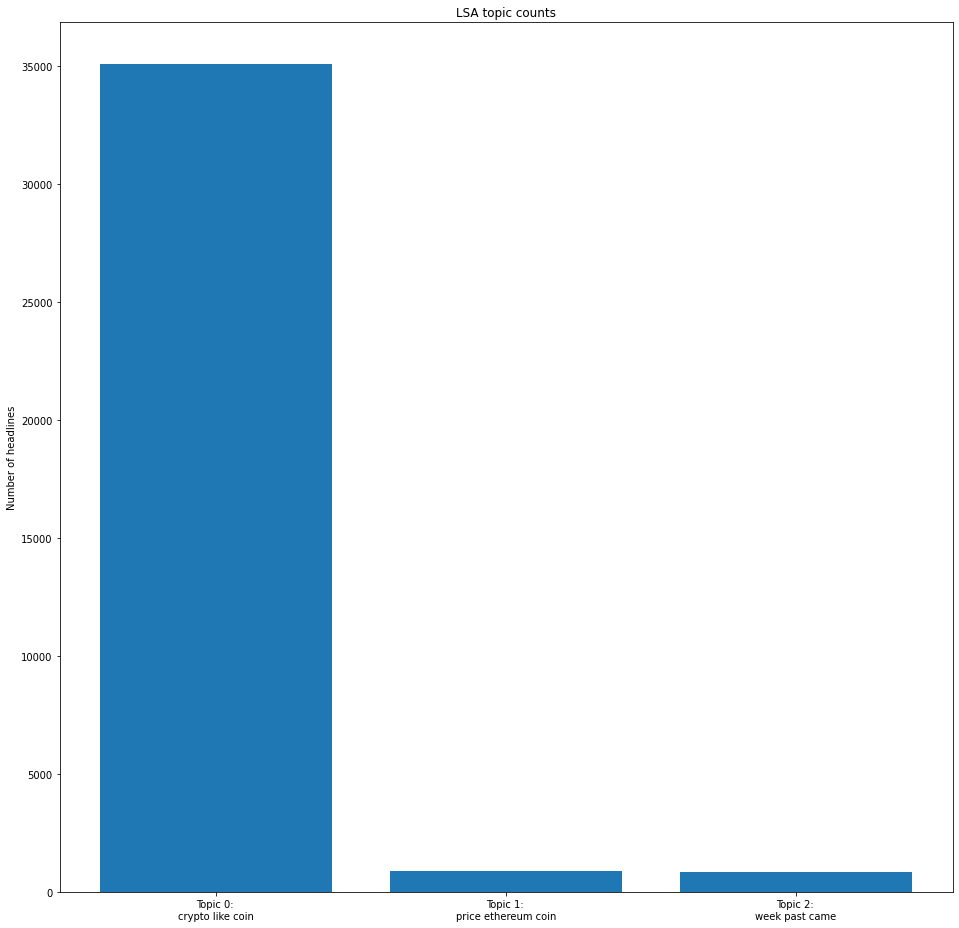

In [53]:
top_3_words = get_top_n_words(3, lsa_keys, d2, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,16))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

### As LSA using sckiti learn does not offer liberty to evaluate the performance either though coherence score or perplexity, only way we can conclude that this LSA model isn't performing well is by checking the seperation between topics. As they overall and fails to accomplish the principal reason of seperability of topic modelling, we can say that LDA produced better results

## PLSA

#### code credit: https://github.com/DhruvilKarani/Non-Negative-Matrix-Factorization/blob/master/NNMF.ipynb

In [82]:
data_text =review_data[['combinedText']].astype('str')
data_text = data_text.iloc[1: , :]
data_text

,combinedText
1,thank laugh with difficult many experienced va...
2,laughing outside
3,whatever happens keep smilinggifgiphyqfdbjmrzd...
4,shit post
5,this doesnt bother expect plan accordingly men...
...,...
37147,looks like steven seagal under siege
37148,thank explaining
37149,mine safe dont worry
37150,poor feel


In [83]:
stopw=stopwords.words('english')
stopw
def stopwords_remove(x):
    terms=x.split()
    terms=[w for w in terms if w not in stopw]
    sentence=' '.join(terms)
    return sentence
data_text['Refined_headlines']=data_text['combinedText'].apply(lambda x: stopwords_remove(x))

In [84]:
headline_sentences=[''.join(text) for text in data_text['Refined_headlines']]

In [85]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(headline_sentences)

In [86]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [87]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [88]:
#number of topics
num_topics=3
#obtain a NMF model.
model = NMF(n_components=num_topics, init='nndsvd');
#fit the model
model.fit(xtfidf_norm)

NMF(init='nndsvd', n_components=3)

In [89]:
def get_nmf_topics(model, n_top_words):
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    word_dict = {};
    for i in range(num_topics):
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic_plsa ' + '{:02d}'.format(i+1)] = words;
    return pd.DataFrame(word_dict)

In [91]:
get_nmf_topics(model, 10)

,Topic_plsa 01,Topic_plsa 02,Topic_plsa 03
0,deleted,removed,thanks
1,user,post,moon
2,bitcoin,karma,good
3,bought,hello,nice
4,crypto,required,like
5,getting,submission,great
6,like,user,thats
7,moon,account,look
8,scam,make,crypto
9,true,crypto,know


### As PLSA using sklearn does not offer liberty to evaluate the performance either though coherence score or perplexity, we cannot compare it with any other topic modelling results. As per the scientific reviews PLSA performs quite similar to that of LDA given the ldamodel is trained with parameters alpha=1 and eta=1. As we had seen above alpha=1 and eta=1 gave lesser coherence score than the alpha 0.9 and eta 0.01, we can conclude again that LDA performs better for our dataset than PLSA. 

# 3.7) Trying to build LDA model using Bigrams,trigrams, quadgrams

#### Code credit: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#9createbigramandtrigrammodels

In [63]:
data=review_data.combinedText.values.tolist()

In [64]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['delete', 'widget', 'removed']]


In [65]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(bigram_mod[data_words[3]])

['whatever', 'happens', 'keep']


In [66]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [67]:
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams)

In [68]:
dictionary2 = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
doc_term_matrix2 = [dictionary2.doc2bow(text) for text in texts]

In [69]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix2, id2word=dictionary2, num_topics=10, random_state=100,
                chunksize=100, passes=30,iterations=100)
lda_model.print_topics()

[(0,
  '0.090*"time" + 0.053*"first" + 0.030*"network" + 0.025*"always" + 0.023*"actually" + 0.021*"community" + 0.018*"easy" + 0.016*"safe" + 0.015*"work" + 0.015*"live"'),
 (1,
  '0.116*"moon" + 0.098*"give" + 0.087*"token" + 0.040*"place" + 0.032*"investor" + 0.028*"public" + 0.027*"big" + 0.024*"average" + 0.022*"control" + 0.021*"accept"'),
 (2,
  '0.049*"coin" + 0.039*"market" + 0.030*"need" + 0.026*"much" + 0.025*"start" + 0.024*"s" + 0.024*"invest" + 0.020*"keep" + 0.018*"buy" + 0.017*"happen"'),
 (3,
  '0.032*"people" + 0.025*"still" + 0.023*"ethereum" + 0.023*"project" + 0.021*"crypto" + 0.020*"many" + 0.020*"wallet" + 0.017*"stake" + 0.015*"find" + 0.013*"platform"'),
 (4,
  '0.054*"crypto" + 0.035*"bitcoin" + 0.034*"think" + 0.031*"good" + 0.028*"money" + 0.025*"make" + 0.023*"year" + 0.022*"go" + 0.021*"price" + 0.017*"want"'),
 (5,
  '0.039*"month" + 0.034*"week" + 0.030*"point" + 0.027*"hope" + 0.027*"next" + 0.022*"currency" + 0.022*"hear" + 0.020*"little" + 0.018*"wait

In [70]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix2, dictionary2)
vis

C:\Users\rudra\anaconda3\envs\best\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.310018 -0.048368       1        1  20.712350
3     -0.267004 -0.099408       2        1  16.133048
2      0.006030  0.345592       3        1  13.682898
6     -0.070454  0.170364       4        1  11.444331
0      0.061410 -0.110623       5        1   7.583083
7      0.124009  0.047102       6        1   7.109981
9      0.130382  0.061556       7        1   7.087991
5      0.075586 -0.144940       8        1   6.888525
8      0.127499 -0.124968       9        1   5.528029
1      0.122560 -0.096306      10        1   3.829765, topic_info=                  Term         Freq        Total Category  logprob  loglift
24                time  4568.000000  4568.000000  Default  30.0000  30.0000
5               crypto  9837.000000  9837.000000  Default  29.0000  29.0000
100               know  4589.000000  4589.000000  Default  28.0000  28.0000
469               moon  2973.000000  2973.000000  Default  27.0000  27.0000
3                 coin  5881.000000  5881.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
7778           harvest   180.880774   181.653110  Topic10  -4.9544   3.2581
1991              cake   177.116717   177.888765  Topic10  -4.9754   3.2580
3148             bonus   173.639848   174.411916  Topic10  -4.9952   3.2579
1739  enough_character   143.276112   144.048034  Topic10  -5.1875   3.2570
220               high   328.469632  1849.925865  Topic10  -4.3578   1.5339

[360 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
656      10  0.997700           accept
396       6  0.997617           access
592       1  0.263738          account
592       4  0.735663          account
126      10  0.997432  action_performe
...     ...       ...              ...
119       2  0.999411            world
92        7  0.999586            worth
263       4  0.998561            write
1151      8  0.998680            wrong
50        1  0.999894             year

[344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 7, 1, 8, 10, 6, 9, 2])

In [72]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix2,total_docs=10000))  # a measure of how good the model is. lower the better.


Perplexity:  -9.366117119048669


### As we can see that there is no improvement as the Bigrams and trigrams were not even listed in the most frequent words in different topics

# Finally we do comparison between models (PLSA vs LDA vs LSA)

### Coherence score of PLSA is calculated on 3 topics using LDA with parameters alpha=1, eta=1 as stated above

In [124]:
comp = [['LDA_10_topics', 0.38116, -8.98432], ['LDA_3_topics', 0.56844, -8.17429],['LDA_3_tuned', 0.55925, -9.41002],['LSA_10_topics', 0.41910, 'NA'],['LSA_3_topics', 0.419111, 'NA'],['PLSA_3_topics', 0.388453, 'NA']]
compar = pd.DataFrame(comp, columns = ['Technique','coherence', 'perplexity'])

In [125]:
compar

,Technique,coherence,perplexity
0,LDA_10_topics,0.381160,-8.98432
1,LDA_3_topics,0.568440,-8.17429
2,LDA_3_tuned,0.559250,-9.41002
3,LSA_10_topics,0.419100,NA
4,LSA_3_topics,0.419111,NA
5,PLSA_3_topics,0.388453,NA


# As proved by the seperability in visualization, we can see that coherence score and perplexity is the best for LDA hypteruned models with 3 topics